In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
fruits = pd.read_table('C:/Users/salah/code/fruit_data_with_colors.txt')




In [3]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

C:\Users\salah\AppData\Local\Temp\ipykernel_17916\3170728594.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


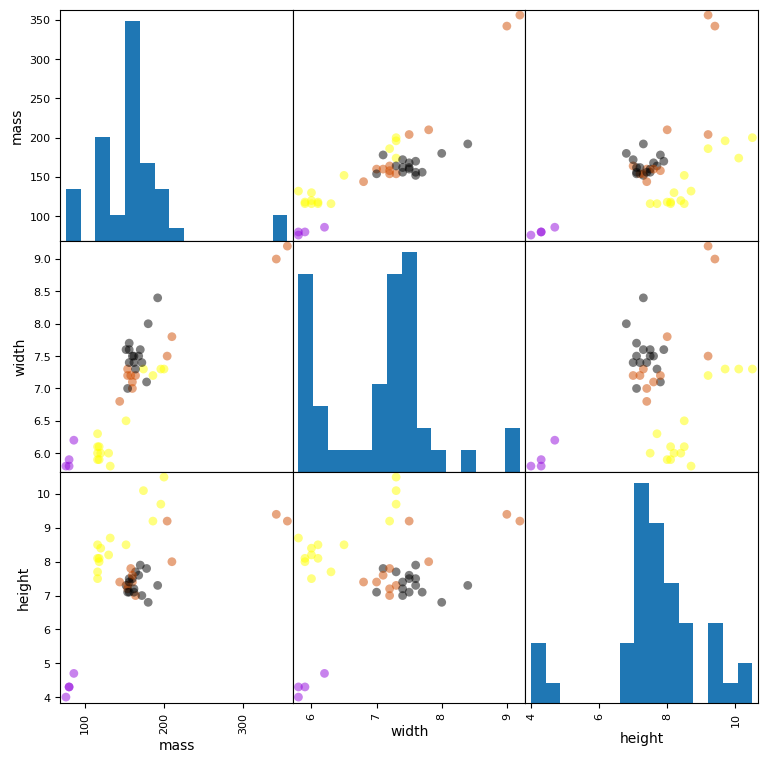

In [5]:
from matplotlib import cm
X =fruits[['mass','width','height']]
y =fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train, marker='o',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)


One or more columns are missing!


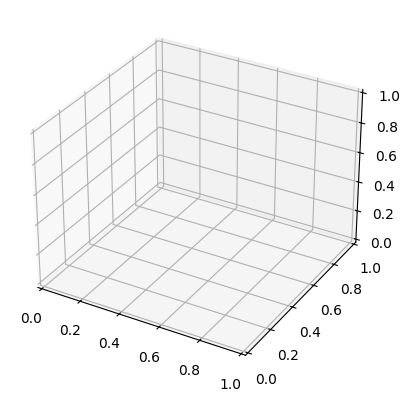

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Using .get() to avoid KeyError and check if column exists
x = X_train.get('width')
y = X_train.get('height')
z = X_train.get('color_score')

if x is not None and y is not None and z is not None:
    ax.scatter(x, y, z, c=y_train, marker='o', s=100)
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    ax.set_zlabel('color_score')
    plt.show()
else:
    print("One or more columns are missing!")

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.80


In [24]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.53


In [21]:
fruit_prediction = knn.predict([[20,4.3,5.3]])
lookup_fruit_name[fruit_prediction[0]]

c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [24]:
fruit_prediction = knn.predict([[100,6.3,8.3]])
lookup_fruit_name[fruit_prediction[0]]

c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


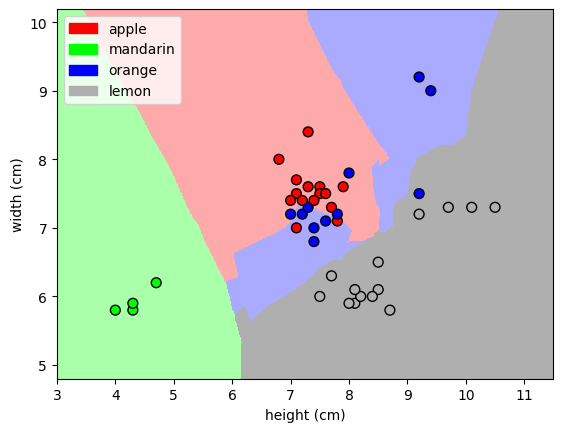

In [30]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,5,'uniform')

c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


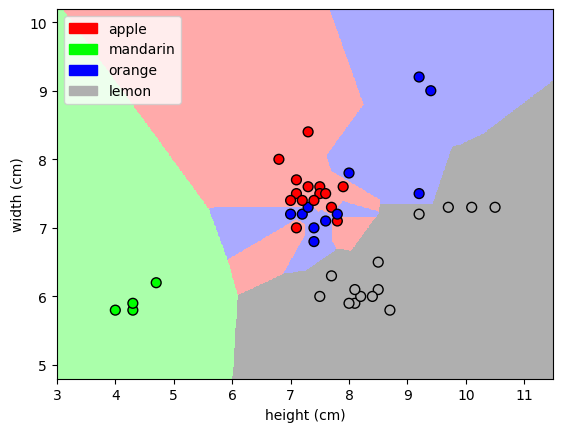

In [31]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,1,'uniform')

c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


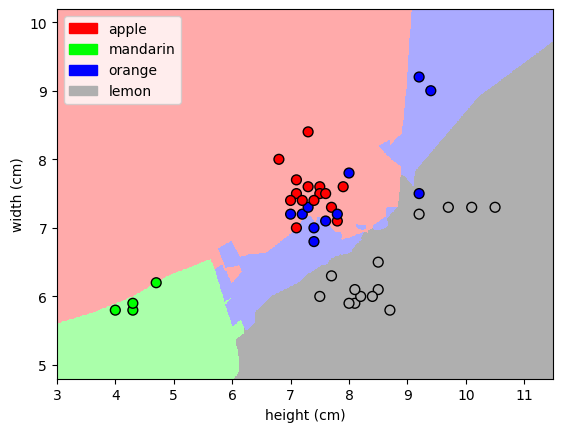

In [32]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,10,'uniform')

([<matplotlib.axis.XTick at 0x1c2153c40b0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

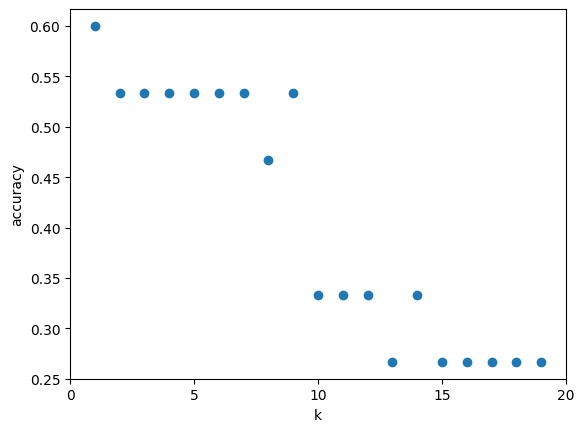

In [27]:
k_range =range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])


<function matplotlib.pyplot.show(close=None, block=None)>

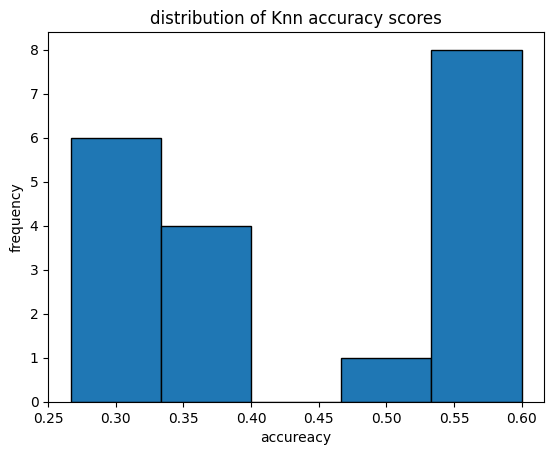

In [28]:
k_range =range(1,20)
scores =[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.hist(scores,bins=5,edgecolor='black')
plt.xlabel('accureacy')
plt.ylabel('frequency')
plt.title('distribution of Knn accuracy scores')
plt.show

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

ValueError: Found input variables with inconsistent numbers of samples: [59, 44]

<Figure size 640x480 with 0 Axes>

In [13]:

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ',
        target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


c:\Users\salah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
import numpy as np 
import pandas as pd
import matplotlib as mp
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=2)
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)
X_fruits = fruits[['mass','height','width','color_score']]
y_fruits = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,random_state=0)
scaler =MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [31]:
print('accuracy of test set:{:.2f}'.format(knn.score(X_test_scaled,y_test)))

accuracy of test set:1.00


In [27]:
print('accuracy of test set:{:.2f}'.format(knn.score(X_train_scaled,y_train)))

accuracy of test set:0.95


In [ ]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                        n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
        marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                    cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
        marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: 'assets/CommViolPredUnnormalizedData.txt'

In [1]:
print('\n'.join(
    [''.join(
        [('Engineer'[(x-y) % 8] if ((x * 0.05) * 2 + (y * 0.1) * 2 - 1)
          * 3 - (x * 0.05) ** 2 * (y * 0.1) ** 3 <= 0 else ' ')
        for x in range(-30, 30)])
    for y in range(15, -15, -1)]
))


ineerEngineerEng                                            
neerEngineerEngin                                           
eerEngineerEnginee                                          
erEngineerEngineerE                                         
rEngineerEngineerEng                                        
EngineerEngineerEngin                                       
ngineerEngineerEngineer                                     
gineerEngineerEngineerEng                                   
ineerEngineerEngineerEngine                                 
neerEngineerEngineerEngineerE                               
eerEngineerEngineerEngineerEngi                             
erEngineerEngineerEngineerEnginee                           
rEngineerEngineerEngineerEngineerEn                         
EngineerEngineerEngineerEngineerEngin                       
ngineerEngineerEngineerEngineerEngineer                     
gineerEngineerEngineerEngineerEngineerEng                   
ineerEngineerEngineerEng

In [2]:
import math

print('\n'.join(
    [''.join(
        [('Engineer'[(x - y) % 8] if (
            (x * 0.05) ** 2 + (y * 0.1) ** 2 - 1) ** 3 - (x * 0.05) ** 2 * (y * 0.1) ** 3 <= 0 
        else ' ')
        for x in range(-30, 30)])
    for y in range(15, -15, -1)]
))


                                                            
                                                            
                                                            
                erEnginee           gineerEng               
            ineerEngineerEngi   rEngineerEngineer           
          gineerEngineerEngineerEngineerEngineerEng         
         gineerEngineerEngineerEngineerEngineerEngin        
        gineerEngineerEngineerEngineerEngineerEnginee       
        ineerEngineerEngineerEngineerEngineerEngineer       
        neerEngineerEngineerEngineerEngineerEngineerE       
        eerEngineerEngineerEngineerEngineerEngineerEn       
        erEngineerEngineerEngineerEngineerEngineerEng       
        rEngineerEngineerEngineerEngineerEngineerEngi       
         ngineerEngineerEngineerEngineerEngineerEngi        
          ineerEngineerEngineerEngineerEngineerEngi         
          neerEngineerEngineerEngineerEngineerEngin         
            rEngineerEng

In [1]:
sparks_API = 'GZk6ELwctMt7Mskij1TEPw7nEFIxtzEr'

In [2]:
import pymatgen.core as mg 
si = mg.Element("Si")
print("Silicon has atomic mass of: ", si.atomic_mass)

Silicon has atomic mass of:  28.0855 amu
